# Simulation 2_b32 - Analysing


## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter as SGfilter
from IPython.display import clear_output, display
import datetime
import joblib
from tqdm import tqdm

import const
import utilities as ut


import gym
import ctfsql
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import DQN
import evaluate as ev

## Defining the parameters of the simulations

In [2]:
n_simulations = 10
n_episodes_training = 10**6
n_episodes_test = 10**3
retest = False
#Not good practice, but allows for when it fails on some machines
#import os
#os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [3]:
env = gym.make('ctfsql-v0')
folder = ""

## Reading the models

In [4]:
dqn_models = []
import glob
for i in range(n_simulations):
    for file in glob.glob(str(i) + "ignore_simul2*.zip"):
        print(folder + file[:-4], end = ":")
        model = DQN.load(folder + file[:-4])
        dqn_models.append(model)
        print(model)


0ignore_simul2_20210218143414869704:<stable_baselines3.dqn.dqn.DQN object at 0x000002AD40C9DC70>
1ignore_simul2_20210218160120897065:<stable_baselines3.dqn.dqn.DQN object at 0x000002AD23D312B0>
2ignore_simul2_20210218173538822207:<stable_baselines3.dqn.dqn.DQN object at 0x000002AD23D38FA0>
3ignore_simul2_20210218191817721878:<stable_baselines3.dqn.dqn.DQN object at 0x000002AD3C288FA0>
4ignore_simul2_20210218204050617401:<stable_baselines3.dqn.dqn.DQN object at 0x000002AD3C2886A0>
5ignore_simul2_20210218220406798780:<stable_baselines3.dqn.dqn.DQN object at 0x000002ADFC863CA0>
6ignore_simul2_20210218232811124508:<stable_baselines3.dqn.dqn.DQN object at 0x000002ADFC8633A0>
7ignore_simul2_20210219005104384978:<stable_baselines3.dqn.dqn.DQN object at 0x000002ADFC890970>
8ignore_simul2_20210219015549758304:<stable_baselines3.dqn.dqn.DQN object at 0x000002ADFC890FD0>
9ignore_simul2_20210219030134866714:<stable_baselines3.dqn.dqn.DQN object at 0x000002ADFC890700>


In [5]:
if(retest):
    rewards = []
    num_steps = []
    for i in tqdm(range(n_simulations)):
        rewards.append(ev2.test_episodes(dqn_models[i], env, num_episodes=1000))
        reward = rewards[-1]
        num_steps.append(10-np.array(reward) + 1)
    num_steps = np.array(num_steps)

In [6]:
if(retest):
    timestamp = datetime.datetime.now().strftime("%Y%m%d%H%M%S%f")
    np.savetxt("ignore_simulation2_b32_num_steps"+timestamp+".csv", num_steps)
    np.savetxt("ignore_simulation2_b32_num_steps.csv", num_steps)
else:
    num_steps = np.loadtxt("ignore_simulation2_b32_num_steps.csv")

mean 214.3773 median 6.0


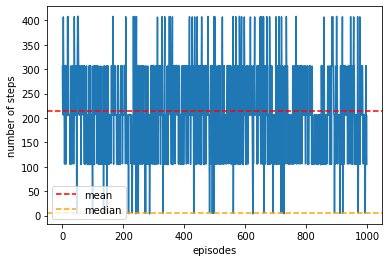

In [7]:
plt.plot(range(n_episodes_test),np.mean(num_steps,axis=0))
plt.xlabel('episodes')
plt.ylabel('number of steps')
plt.axhline(np.mean(num_steps),c='red',ls='--',label='mean')
plt.axhline(np.median(num_steps),c='orange',ls='--',label='median')
print("mean",np.mean(num_steps), "median", np.median(num_steps))
plt.legend()
num_steps = np.array(num_steps)
plt.savefig("figures/sim2_b32_test1.png")

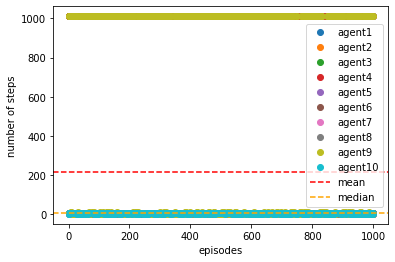

In [8]:
for i in range(n_simulations):
    plt.plot(range(n_episodes_test),num_steps[i,:], "o", label = "agent"+str(i+1))
plt.xlabel('episodes')
plt.ylabel('number of steps')
plt.axhline(np.mean(num_steps),c='red',ls='--',label='mean')
plt.axhline(np.median(num_steps),c='orange',ls='--',label='median')
plt.legend()
num_steps = np.array(num_steps)
plt.savefig("figures/sim2_b32_test2.png")

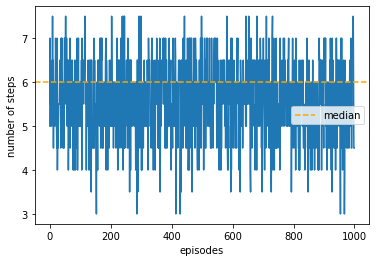

In [9]:
plt.plot(range(n_episodes_test),np.median(num_steps,axis=0))
plt.xlabel('episodes')
plt.ylabel('number of steps')
plt.axhline(np.median(num_steps),c='orange',ls='--',label='median')
plt.legend()

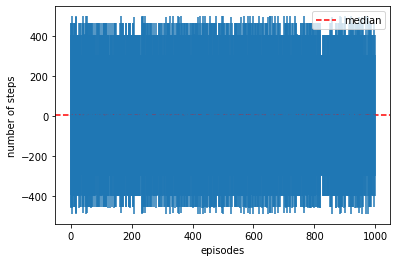

In [10]:
plt.errorbar(range(n_episodes_test),np.median(num_steps,axis=0),yerr=np.std(num_steps,axis=0))
plt.xlabel('episodes')
plt.ylabel('number of steps')
plt.axhline(np.median(num_steps),c='red',ls='--',label='median')
plt.legend()

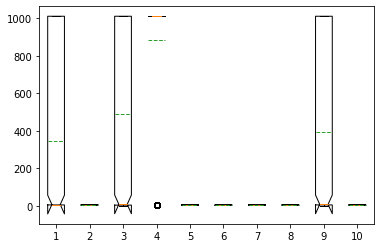

In [11]:
plt.boxplot(num_steps.T, notch = True, showmeans = True, meanline = True)
plt.savefig("figures/sim2_b32_notch_test3.png")

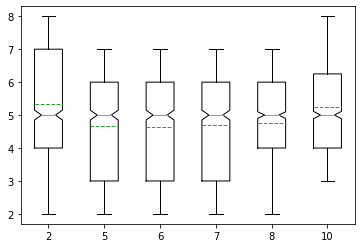

In [12]:
good = np.array([1,4,5,6,7,9])
plt.boxplot(num_steps[good,:].T, notch=True, labels = (good+1), showmeans = True, meanline = True)#, meanprops = dict(color="red"))
plt.savefig("figures/sim2_b32_notch_test4.png")

4.894833333333334 5.0


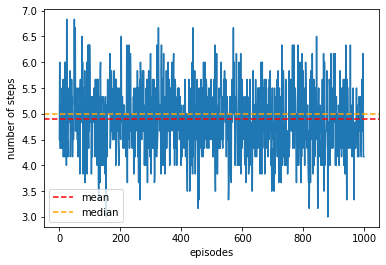

In [13]:
good_steps = num_steps[good,:]
plt.plot(range(n_episodes_test),np.mean(good_steps,axis=0))
plt.xlabel('episodes')
plt.ylabel('number of steps')
plt.axhline(np.mean(good_steps),c='red',ls='--',label='mean')
plt.axhline(np.median(good_steps),c='orange',ls='--',label='median')
print(np.mean(good_steps), np.median(good_steps))
plt.legend()
plt.savefig("figures/sim2_b32_test5.png")

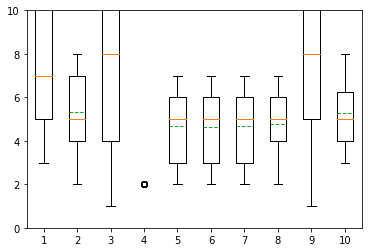

In [14]:
plt.boxplot(num_steps.T, notch=False, showmeans = True, meanline = True)
plt.ylim([0,10])
plt.savefig("figures/sim2_1_notch_test6.png")